# Target
1. Exploratory Data Analysis
2. Feature Engineering

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
df = pd.read_csv("Wrangled_data.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing_Outcome,Landing_Region
0,1,6/4/2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0,None
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0,None
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0,None
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0,Ocean
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0,None


In [79]:
df.drop(['Outcome'], axis=1, inplace=True)

In [80]:
df = df.rename(columns={'Landing_Outcome':'Landing_Class'})
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing_Class,Landing_Region
0,1,6/4/2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0,None
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0,None
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0,None
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0,Ocean
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0,None


# Relationship between feature Analysis:

1. Flight Number vs Launch site

<Figure size 2000x1000 with 0 Axes>

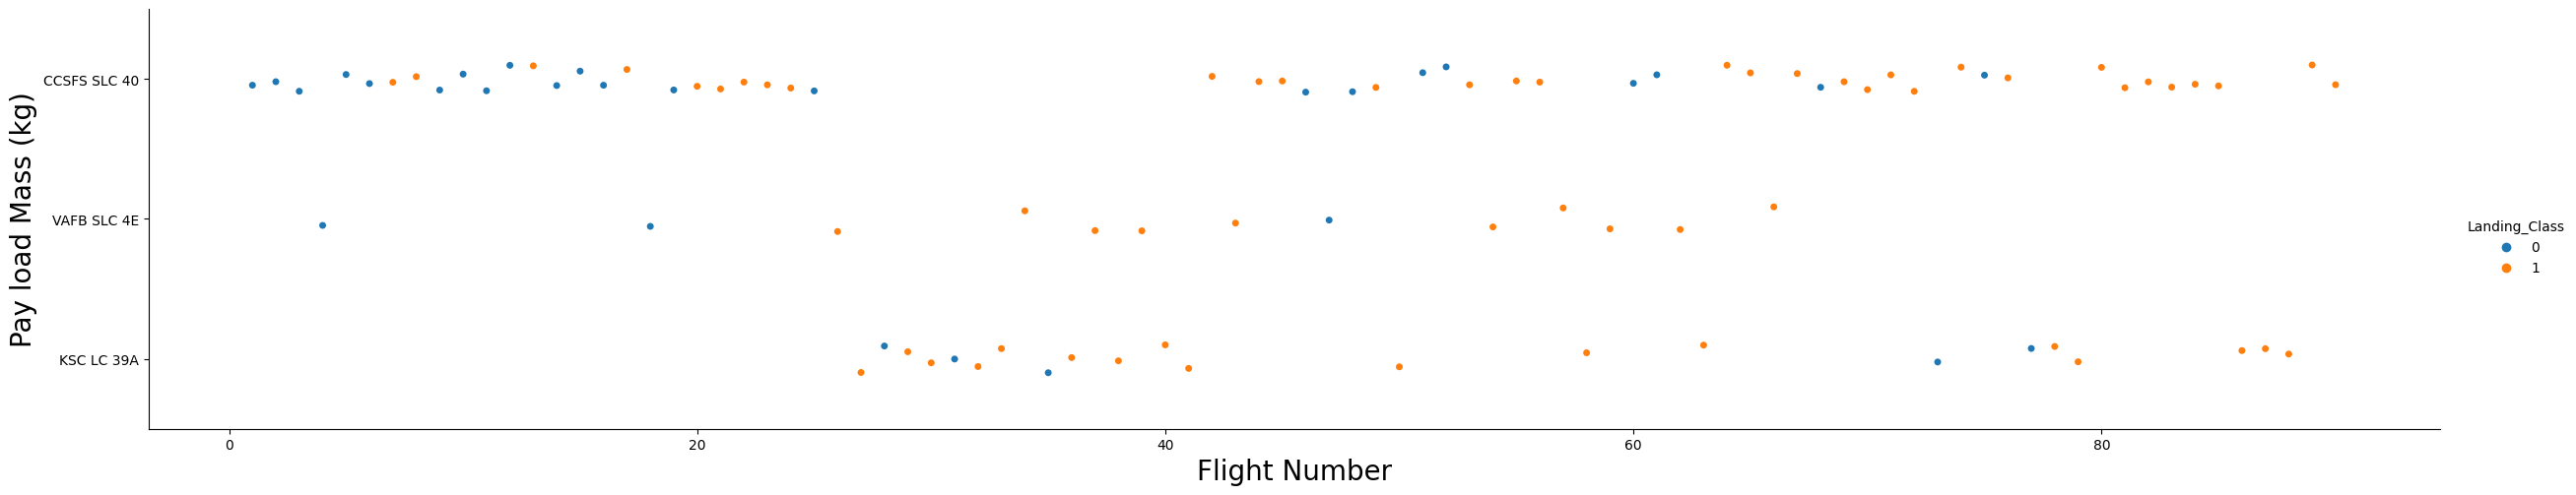

In [81]:
plt.figure(figsize=(20,10))

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Landing_Class", data=df, aspect = 5)


plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()


2. Payload mass vs LaunchSite

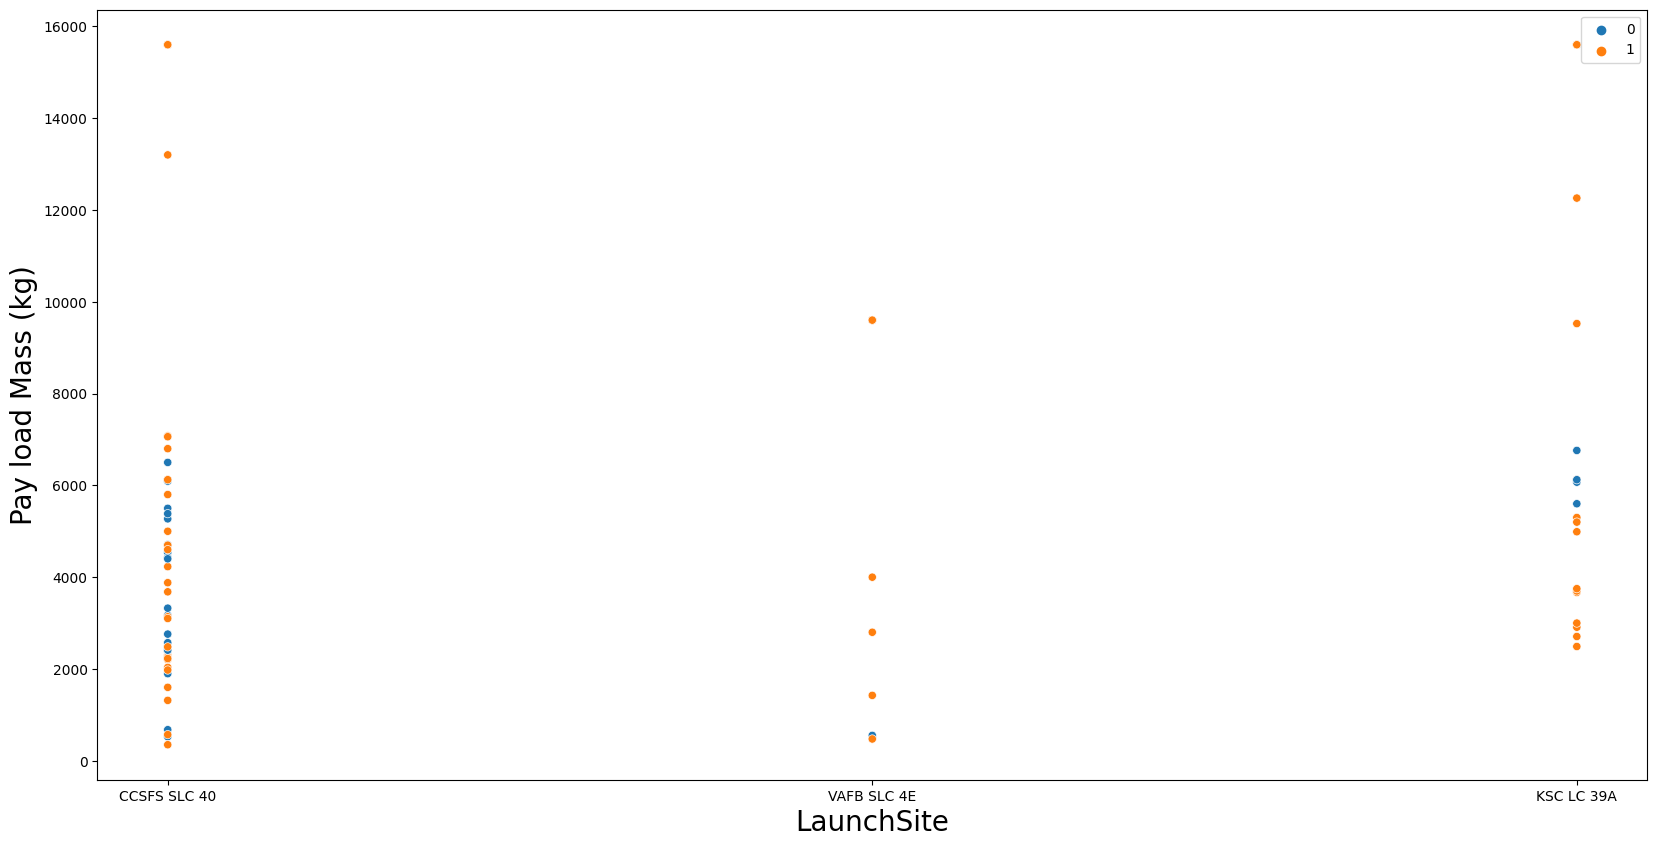

In [82]:
plt.figure(figsize=(20,10))

sns.scatterplot(x="LaunchSite", y="PayloadMass", hue="Landing_Class", data=df)


plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.legend(loc='best')
plt.show()

3. Flight Number vs Orbit Type

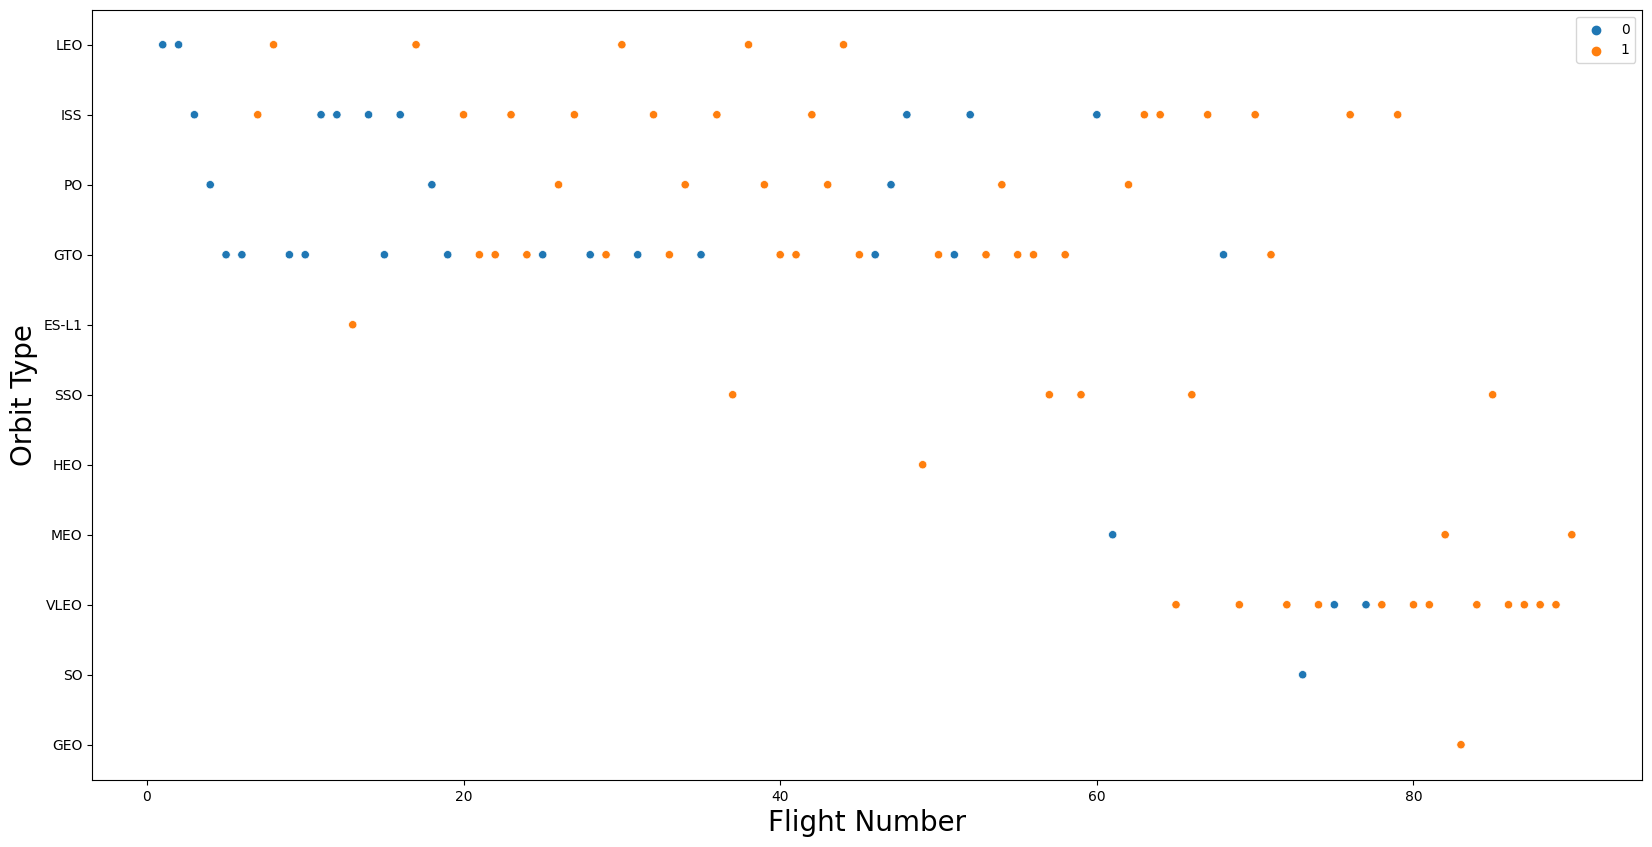

In [83]:
plt.figure(figsize=(20,10))

sns.scatterplot(x="FlightNumber", y="Orbit", hue="Landing_Class", data=df)


plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.legend(loc='best')
plt.show()

4. Payload mass vs Orbit Type

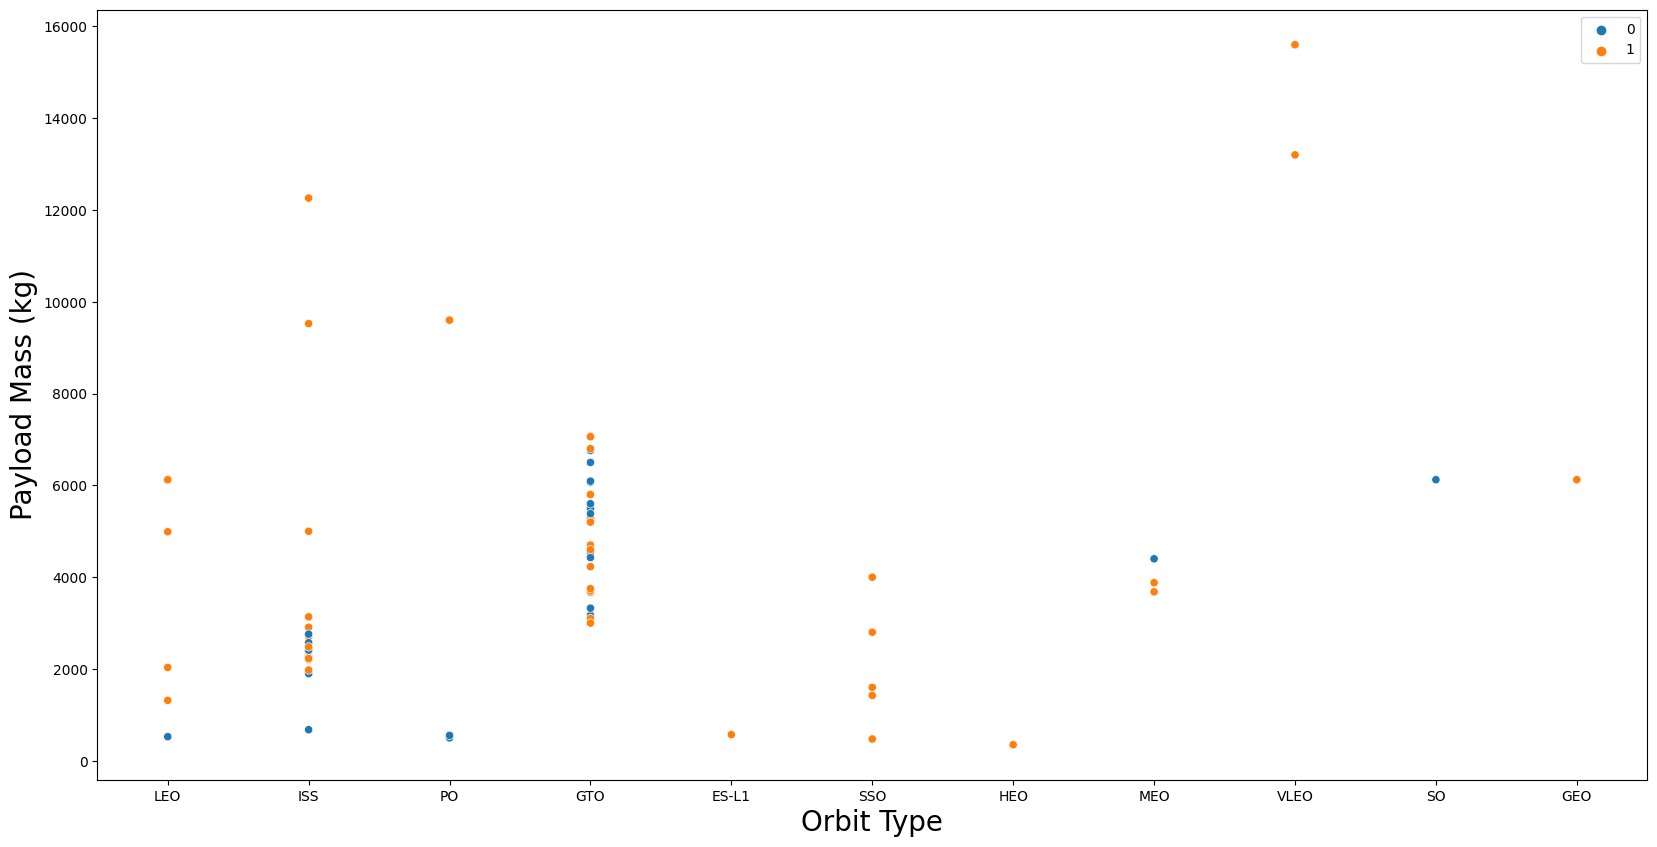

In [84]:
plt.figure(figsize=(20,10))

sns.scatterplot(y="PayloadMass", x="Orbit", hue="Landing_Class", data=df)


plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.xlabel("Orbit Type",fontsize=20)
plt.legend(loc='best')
plt.show()

# Success Rate Analysis

Overall Success rate

In [85]:
percentage = round(100 * df["Landing_Class"].value_counts() / df.shape[0], 2)
print(" The success and failure rate is: \n", percentage)

 The success and failure rate is: 
 1    66.67
0    33.33
Name: Landing_Class, dtype: float64


**1. Success rate by Orbit type**

In [86]:
Success_rate_by_Orbit = df.groupby(by=['Orbit'])['Landing_Class'].mean().reset_index()
Success_rate_by_Orbit = Success_rate_by_Orbit.rename(columns={'Landing_Class' : 'Success Rate'})
Success_rate_by_Orbit['Success Rate'] = 100*Success_rate_by_Orbit['Success Rate'].values
Success_rate_by_Orbit

,Orbit,Success Rate
0,ES-L1,100.000000
1,GEO,100.000000
2,GTO,51.851852
3,HEO,100.000000
4,ISS,61.904762
5,LEO,71.428571
6,MEO,66.666667
7,PO,66.666667
8,SO,0.000000
9,SSO,100.000000


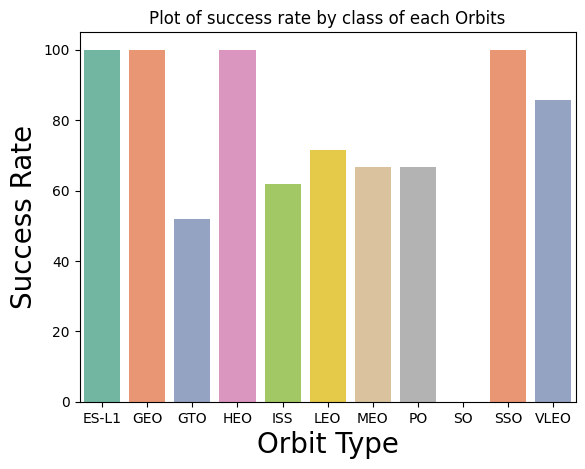

In [87]:
plt.Figure(figsize=(12,6))

sns.barplot(x = 'Orbit', y = 'Success Rate', data=Success_rate_by_Orbit, palette= 'Set2')

plt.title('Plot of success rate by class of each Orbits', fontdict={'size':12})
plt.ylabel("Success Rate",fontsize=20)
plt.xlabel("Orbit Type",fontsize=20)
plt.show()

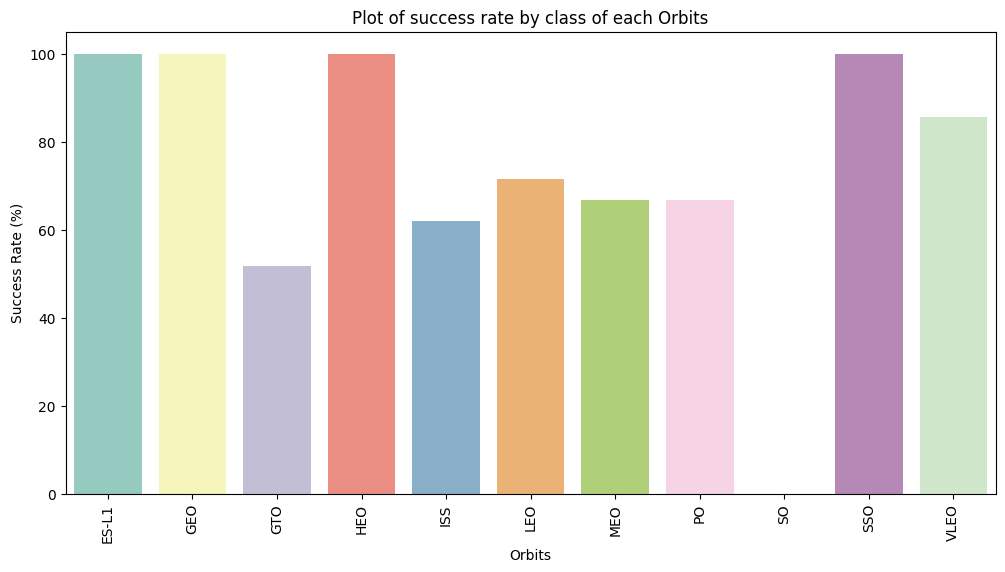

In [88]:
fig, ax=plt.subplots(figsize=(12,6))

ax = sns.barplot(x = 'Orbit', y = 'Success Rate', data= Success_rate_by_Orbit, palette= 'Set3')

ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Success Rate (%)', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

### 2. Success Rate by Launch sites

In [89]:
Success_rate_by_LS = df.groupby(by=['LaunchSite'])['Landing_Class'].mean().reset_index()
Success_rate_by_LS = Success_rate_by_LS.rename(columns={'Landing_Class' : 'Success Rate'})
Success_rate_by_LS['Success Rate'] = 100*Success_rate_by_LS['Success Rate'].values
Success_rate_by_LS

,LaunchSite,Success Rate
0,CCSFS SLC 40,60.000000
1,KSC LC 39A,77.272727
2,VAFB SLC 4E,76.923077


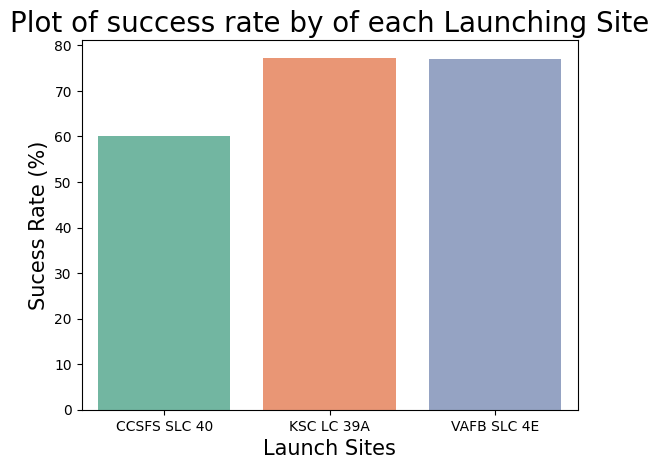

In [90]:
plt.Figure(figsize=(12,6))

sns.barplot(x = 'LaunchSite', y = 'Success Rate', data = Success_rate_by_LS, palette='Set2')

plt.xlabel('Launch Sites', fontsize = 15)
plt.ylabel('Sucess Rate (%)', fontsize = 15)
plt.title('Plot of success rate by of each Launching Site',fontdict={'size':20})

plt.show()

**2. Success rate by Landing Pad**

In [91]:
Success_rate_by_LP = df.groupby(by=['LandingPad'])['Landing_Class'].mean().reset_index()
Success_rate_by_LP = Success_rate_by_LP.rename(columns={'Landing_Class' : 'Success Rate'})
Success_rate_by_LP['Success Rate'] = 100*Success_rate_by_LP['Success Rate'].values
Success_rate_by_LP

,LandingPad,Success Rate
0,5e9e3032383ecb267a34e7c7,92.307692
1,5e9e3032383ecb554034e7c9,100.000000
2,5e9e3032383ecb6bb234e7ca,85.714286
3,5e9e3032383ecb761634e7cb,0.000000
4,5e9e3033383ecbb9e534e7cc,91.666667


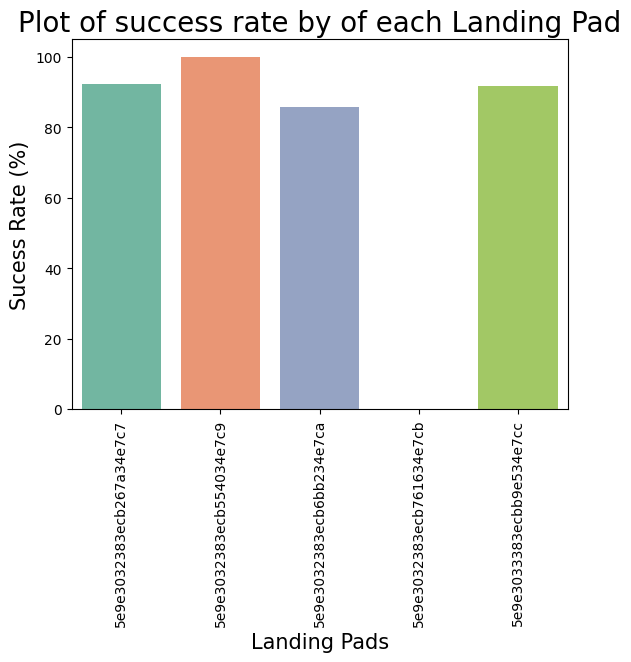

In [92]:
plt.Figure(figsize=(12,6))

sns.barplot(x = 'LandingPad', y = 'Success Rate', data = Success_rate_by_LP, palette='Set2')

plt.xlabel('Landing Pads', fontsize = 15)
plt.ylabel('Sucess Rate (%)', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Plot of success rate by of each Landing Pad',fontdict={'size':20})

plt.show()

**3. Success rate by Landing Region**

In [93]:
Success_rate_by_LR = df.groupby(by=['Landing_Region'])['Landing_Class'].mean().reset_index()
Success_rate_by_LR = Success_rate_by_LR.rename(columns={'Landing_Class' : 'Success Rate'})
Success_rate_by_LR['Success Rate'] = 100*Success_rate_by_LR['Success Rate'].values
Success_rate_by_LR

,Landing_Region,Success Rate
0,ASDS,83.673469
1,None,0.000000
2,Ocean,71.428571
3,RTLS,93.333333


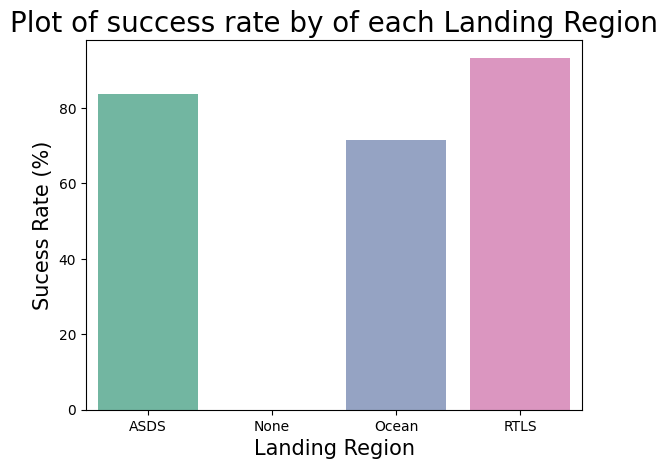

In [94]:
plt.Figure(figsize=(12,6))

sns.barplot(x = 'Landing_Region', y = 'Success Rate', data = Success_rate_by_LR, palette='Set2')

plt.xlabel('Landing Region', fontsize = 15)
plt.ylabel('Sucess Rate (%)', fontsize = 15)
plt.title('Plot of success rate by of each Landing Region',fontdict={'size':20})

plt.show()

**4. If the rocket was resued successfully or not after the first stage landing**

In [95]:
Success_rate_by_RU = df.groupby(by=['Reused'])['Landing_Class'].mean().reset_index()
Success_rate_by_RU = Success_rate_by_RU.rename(columns={'Landing_Class' : 'Success Rate'})
Success_rate_by_RU['Success Rate'] = 100*Success_rate_by_RU['Success Rate'].values
Success_rate_by_RU

,Reused,Success Rate
0,False,58.490566
1,True,78.378378


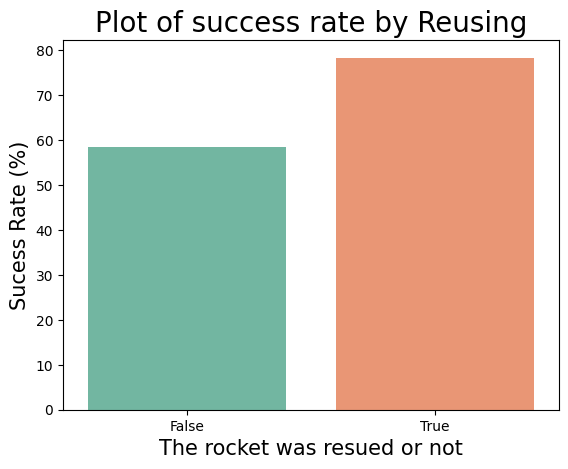

In [96]:
plt.Figure(figsize=(12,6))

sns.barplot(x = 'Reused', y = 'Success Rate', data = Success_rate_by_RU, palette='Set2')

plt.xlabel('The rocket was resued or not', fontsize = 15)
plt.ylabel('Sucess Rate (%)', fontsize = 15)
plt.title('Plot of success rate by Reusing',fontdict={'size':20})

plt.show()

**4. Success rate by Reused count**

In [97]:
Success_rate_by_RUC = df.groupby(by=['ReusedCount'])['Landing_Class'].mean().reset_index()
Success_rate_by_RUC = Success_rate_by_RUC.rename(columns={'Landing_Class' : 'Success Rate'})
Success_rate_by_RUC['Success Rate'] = 100*Success_rate_by_RUC['Success Rate'].values
Success_rate_by_RUC

,ReusedCount,Success Rate
0,0,24.137931
1,1,83.333333
2,2,66.666667
3,3,75.000000
4,4,75.000000
5,5,100.000000
6,8,100.000000
7,9,100.000000
8,12,100.000000
9,13,100.000000


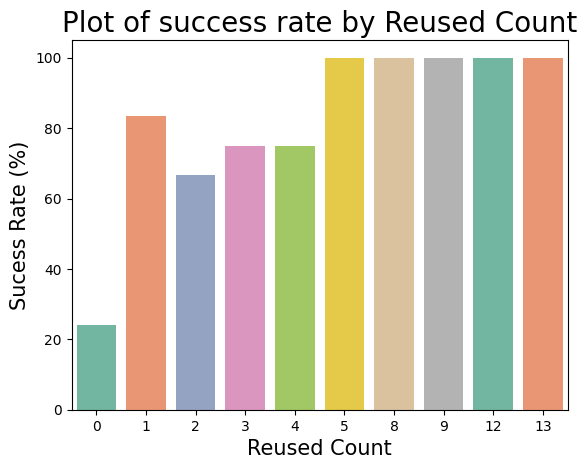

In [98]:
plt.Figure(figsize=(12,6))

sns.barplot(x = 'ReusedCount', y = 'Success Rate', data = Success_rate_by_RUC, palette='Set2')

plt.xlabel('Reused Count', fontsize = 15)
plt.ylabel('Sucess Rate (%)', fontsize = 15)
plt.title('Plot of success rate by Reused Count',fontdict={'size':20})

plt.show()

### Let's look at the success rate of first stage landing over the years by block, fligh numbers and Payload Mass.

In [99]:
def plot_kde(df, column_names, target, ncols=2):
    nrows = int(len(column_names)/ncols)
    _, ax = plt.subplots(figsize = (5.5 * ncols * 1.1, 3 * nrows * 1.3), ncols = ncols, nrows = nrows )
    for i in range(len(column_names)):
        sns.kdeplot(data = df, x = column_names[i], hue = target , alpha = 0.9, ax=ax[i//ncols][i%ncols]) 
    plt.show

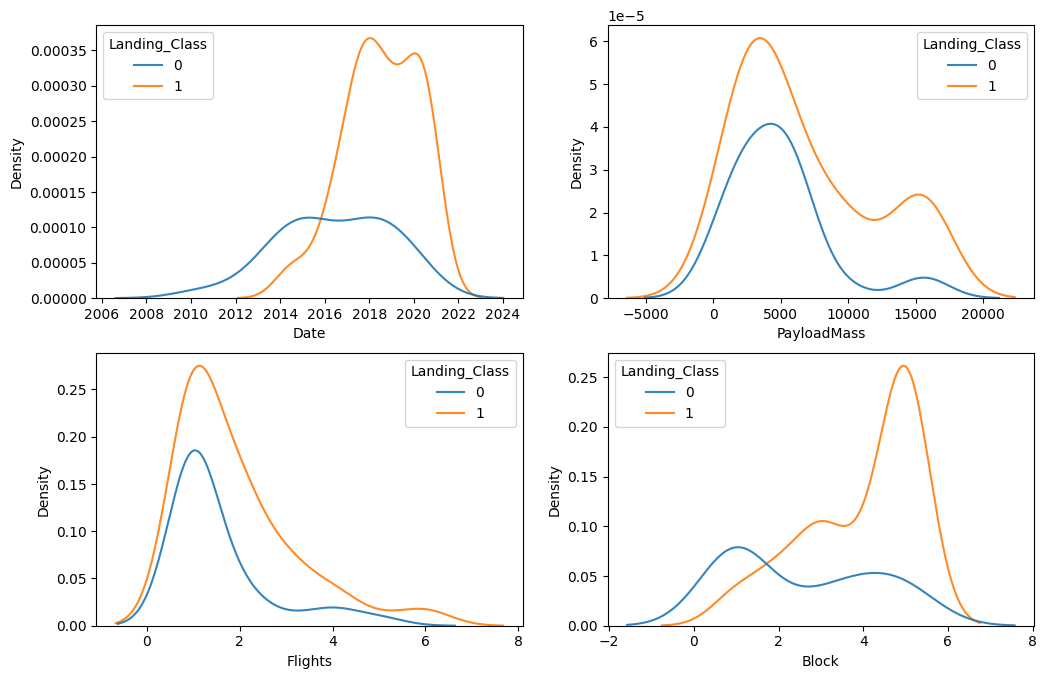

In [100]:
df["Date"] = pd.to_datetime(df["Date"])
column_names = ["Date", "PayloadMass", "Flights", "Block"]
plot_kde(df, column_names, target = "Landing_Class", ncols=2)